In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin/data.csv


In [6]:
df =pd.read_csv('/kaggle/input/breast-cancer-wisconsin/data.csv')

In [13]:
#Step 1: Choose a Binary Classification Dataset


# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Display dataset info
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Sample target values:", y[:10])

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of X: (569, 30)
Shape of y: (569,)
Sample target values: [0 0 0 0 0 0 0 0 0 0]


In [14]:
#Step 2:train/test split and standardize features

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show a few rows before and after scaling
import numpy as np

print("\nSample original feature row (before scaling):")
print(np.round(X_train[0], 2))

print("\nSample scaled feature row (after scaling):")
print(np.round(X_train_scaled[0], 2))

Training set shape: (455, 30)
Test set shape: (114, 30)

Sample original feature row (before scaling):
[9.030e+00 1.733e+01 5.879e+01 2.505e+02 1.100e-01 1.400e-01 3.100e-01
 4.000e-02 2.100e-01 8.000e-02 3.300e-01 1.190e+00 1.880e+00 1.767e+01
 1.000e-02 9.000e-02 3.000e-01 3.000e-02 4.000e-02 1.000e-02 1.031e+01
 2.265e+01 6.550e+01 3.247e+02 1.500e-01 4.400e-01 1.250e+00 1.800e-01
 4.200e-01 1.200e-01]

Sample scaled feature row (after scaling):
[-1.44 -0.44 -1.36 -1.14  0.78  0.72  2.82 -0.12  1.09  2.46 -0.26 -0.02
 -0.47 -0.47  0.84  3.25  8.44  3.39  2.62  2.06 -1.23 -0.48 -1.25 -0.97
  0.72  1.19  4.67  0.93  2.1   1.89]


In [15]:
#Step 3: Fit a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Print model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature_name, coef in zip(data.feature_names, model.coef_[0]):
    print(f"{feature_name}: {coef:.4f}")

Intercept: [0.44359695]
Coefficients:
mean radius: -0.4279
mean texture: -0.3939
mean perimeter: -0.3896
mean area: -0.4643
mean smoothness: -0.0668
mean compactness: 0.5421
mean concavity: -0.7968
mean concave points: -1.1170
mean symmetry: 0.2357
mean fractal dimension: 0.0767
radius error: -1.2711
texture error: 0.1886
perimeter error: -0.6094
area error: -0.9098
smoothness error: -0.3125
compactness error: 0.6860
concavity error: 0.1808
concave points error: -0.3177
symmetry error: 0.5000
fractal dimension error: 0.6134
worst radius: -0.8786
worst texture: -1.3422
worst perimeter: -0.5876
worst area: -0.8466
worst smoothness: -0.5499
worst compactness: 0.0052
worst concavity: -0.9457
worst concave points: -0.7734
worst symmetry: -1.2085
worst fractal dimension: -0.1542


Confusion Matrix:
 [[41  2]
 [ 1 70]]
Precision: 0.97
Recall: 0.99
ROC-AUC Score: 1.00


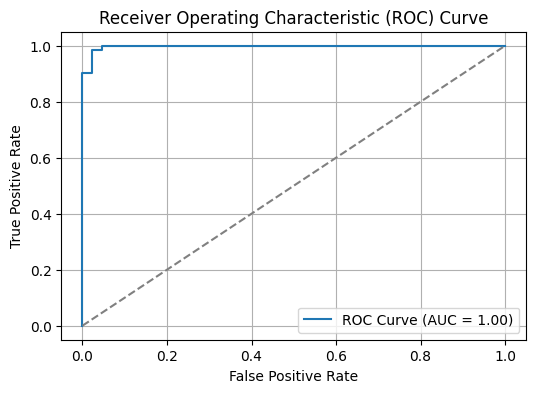

In [16]:
#Step 4: Evaluate with Confusion Matrix, Precision, Recall, ROC-AUC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#Step 5: Tune Threshold and Explain Sigmoid Function#
import numpy as np

# Example sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Show sigmoid values for a range
z_values = np.linspace(-10, 10, 5)
sigmoid_values = sigmoid(z_values)
print("z-values:", z_values)
print("Sigmoid(z):", np.round(sigmoid_values, 4))

z-values: [-10.  -5.   0.   5.  10.]
Sigmoid(z): [0.     0.0067 0.5    0.9933 1.    ]
